In [1]:
cd Downloads/

/home/rokusu/Downloads


### All Problems:-

### • Question 1 Do a descriptive analysis of all the variables.
### Answer given in the notebook below


### • Question 2 There is a new customer who needs a loan. Which models will be best suited to predict the loan_amount that can be granted to the customer?
### Answer 2• Our problem here requires a regression model,Tree based models perform exceptionally well with categorical variables and for high interpretebility one can use polynomial regression. Either of these two but if you can define certain categories of how much loan amount can be given then this problem can be converted to classification problem and then we can use trees like GBT


### • Question 3 Part A: Build a model to predict the maximum loan_amount that can be granted to the customer. Part B: Which all variables are good predictors?
### Answer given in the notebook below


### • Question 4 Build atleast one model from scratch that fits this data, without using any third party packages like sklearn, glm, lm, rpart, etc. You are free to use linear algebra packages like scipy, numpy or any blas derivative. We would be more interested in the convergence of the algorithm rather than the prediction accuracy.
### Answer 4• I have built a polynomial regression from scratch using numpy and linear algebra. I have also written a basic cost function and a gradient descent function to optimize cost. Because of learning rate our model is converging very slowly even after 100 iterations or we can also say we already got the most optimised weights for this model, see in the notebook below


### • Question 5 Is loan_purpose a significant predictor? The business has insisted on using loan_purpose as a predictor. If it is not already a significant contributor, can we still modify the model to include it?
### Answer• loan_purpose is a significant contributor, its the 7th top/best features See Below </font

#### <font color='red'> • Question 6 How will you measure the fitness of the model? Which metrics (accuracy, recall, etc.) are most relevant? </font>
<font color='green'> Answer 6• Mostly R-Squared along with Adjusted R-Squared are used in Regression for checking goodness of fit. Evaluation metrics like Mean Absolute Error, Mean Squared Error and Root MSE are relevant in Regression </font>


In [2]:
import pandas as pd
df = pd.read_csv('trainingData.csv')

In [3]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


## Answer 1 Descriptive Analysis and stats of all features

In [4]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


#### filling missing values with mode

In [5]:
import pandas as pd
import numpy as np

for x in df.columns:
    df[x] = df[x].fillna(df[x].mode()[0])

## converting string categorical values to numerical using label encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1].values.reshape(len(df),1)
list1=[]

# Encoding the variable
for x in X.columns:
    if X[x].dtype not in ['int64','float64']:
        list1.append(x)
        
Lbldf = X[list1]
X = X.drop(list1,axis=1)
Lbldf = Lbldf.apply(lambda x: d[x.name].fit_transform(x))

# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# df.apply(lambda x: d[x.name].transform(x))

In [7]:
X = pd.concat([X,Lbldf],axis=1)

## standardized dataframe all values are now in range 0 to 1

In [8]:
for x in X.columns:
    X[x] = (X[x]- X[x].min())/(X[x].max()-X[x].min())

# X = df.iloc[:,:-1]  #independent columns
# y = df.iloc[:,-1]    #target column

## Answer 3 Building a tree based regressor and also look at top contributors, other ways to determine important variables are by using f_test_regression in selectKbest, looking at p values from hypothesis testing in different tests t test, student test, you can also use ANCOVA to see if predictor is good

/home/rokusu/rokusu/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


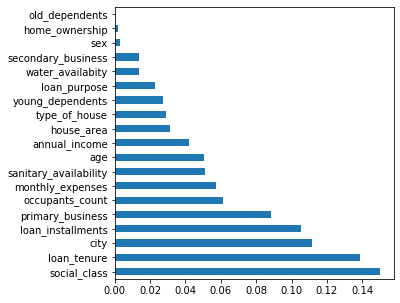

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importanLblEncodictf tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(5,5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## In the picture above you can see old dependents, sex, home_ownership are less significant and social_class, loan-tenure, city, primary business are top contributors

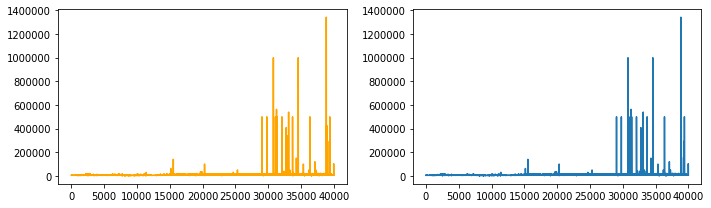

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes[0].plot(y,color='orange')
axes[1].plot(model.predict(X))
fig.tight_layout()
plt.show()

#### in the picture above you can see how well the model has learned the training data, gives a very accurate prediction

.

## Answer 4 building model from scratch
##### Equation of Regression for target y = weight * X + intercept
##### intercept could be bias as well, Let's add bias to the values

In [9]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

#### Initializing weights as 0 in the beginning

In [10]:
weights = np.zeros(X.shape[1])       #-----> all weights are 0
# np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)     #---> optimised weights

#### alpha is the learning rate will be used in our gradient descent function

In [11]:
alpha = 0.01

In [117]:
iterations = 15

## Cost function calculates (ypred-yactual)^2

In [118]:
def Costfunc(X,y,wts):
    costval = np.power(((X.dot(wts))-y),2)
    return np.sum(costval)/(2 * len(X))

## basic gradient descent function that updates weights on the basis of cost and learning rate

In [119]:
def GradientDescentFunc(X,y,wts,iterations,alpha):
    costlist = []
    for i in range(iterations):
        wts = wts - ((alpha/len(X)) * (X.dot(weights) - y).T.dot(X))
        costlist.append(Costfunc(X, y, wts))
    return wts,costlist
g,cost = GradientDescentFunc(X,y,weights,iterations,alpha)
print('final optimised weights',g)

finalCost = Costfunc(X,y,g)
y_pred=X.dot(g)
print('final optimised cost Mean Squared error',finalCost)

final optimised weights [1.26188888e+03 6.74868714e-02 4.37640917e+01 2.07780637e+01
 1.99422500e+01 2.06924679e+02 1.22805000e+03 3.41152851e-02
 1.03503624e+00 1.08467737e+03 1.13841637e+03 1.43543208e+02
 3.33379884e+02 6.48012877e+02 4.02515625e+01 7.23764005e+02
 6.56071214e+02 1.11974062e+03 7.98038625e+02 3.90904375e+02]
final optimised cost Mean Squared error 93033982.8072023


## another way of telling significance of variables is by looking at their final coefficients after training

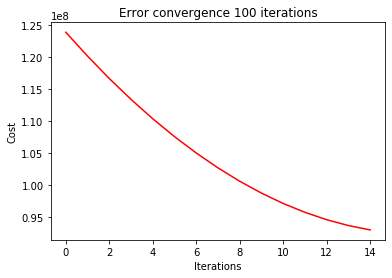

In [122]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error convergence 100 iterations')
plt.show()

## output of model built from scratch not a great one but interesting stats is mean of both yactual and ypred is same, a better gradient descent function is required for better optimisation

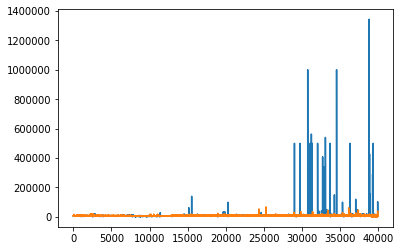

In [316]:
fig, ax = plt.subplots(1, 1)
ax.plot(y)
ax.plot(y_pred)
ax.set_title('Blue Actual, Orange Predicted')
plt.show()